# Clip and Sharpen

## Setting up

In [1]:
import rasterio
from rasterio.plot import show
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = 0, 1000
    new_array = ((array - array_min)/(array_max - array_min))
    new_array[new_array > 1] = 1
    new_array[new_array < 0] = 0
    return new_array

def composite(raster_file, false_color=False):
    raster = rasterio.open(raster_file)
    if false_color:
        red = raster.read(4)
        green = raster.read(3)
        blue = raster.read(2)
    else:
        red = raster.read(3)
        green = raster.read(2)
        blue = raster.read(1)

    # Normalize the bands
    redn = normalize(red)
    greenn = normalize(green)
    bluen = normalize(blue)
    # Create RGB natural color composite
    rgb = np.dstack((redn, greenn, bluen))
    return rgb

In [2]:
os.system("python /block/run.py")

0

## Image - True color composite

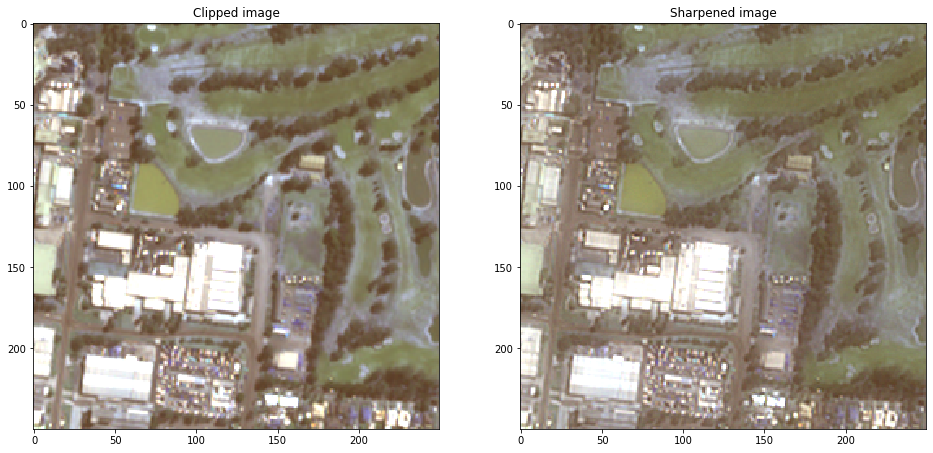

In [3]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121)
ax1.imshow(composite("cropped.tif"))
ax1.set_title('Clipped image')
ax2 = fig.add_subplot(122)
ax2.imshow(composite("high_pass.tif"))
ax2.set_title('Sharpened image')
plt.show()

## Image - False color composite

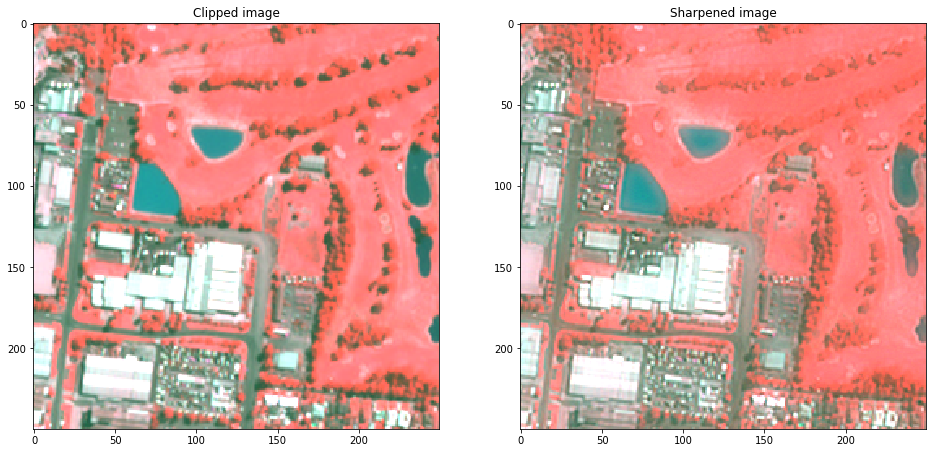

In [4]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(121)
ax1.imshow(composite("cropped.tif", false_color=True))
ax1.set_title('Clipped image')
ax2 = fig.add_subplot(122)
ax2.imshow(composite("high_pass.tif", false_color=True))
ax2.set_title('Sharpened image')
plt.show()

## Gaussian filter mechanics

Sharpen Filter - The filter works by identifying sharp edge boundaries in the image, such as the edge between a subject and a background of a contrasting color, and increasing the image contrast in the area immediately around the edge. [Wikipedia](https://en.wikipedia.org/wiki/Edge_enhancement)

In [5]:
cropped = rasterio.open("cropped.tif")
data = cropped.read(1)
blurred = ndimage.gaussian_filter(data, 3)
filter_blurred = ndimage.gaussian_filter(blurred, 1)
noise = (blurred - filter_blurred)
sharpened = data - 1*noise

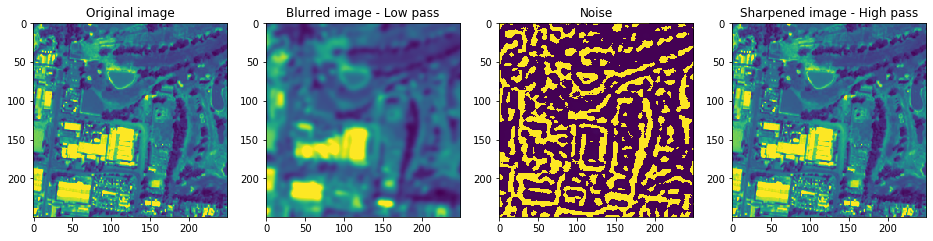

In [6]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(141)
ax1.imshow(normalize(data))
ax1.set_title('Original image')
ax2 = fig.add_subplot(142)
ax2.imshow(normalize(blurred))
ax2.set_title('Blurred image - Low pass')
ax3 = fig.add_subplot(143)
ax3.imshow(normalize(noise))
ax3.set_title('Noise')
ax4 = fig.add_subplot(144)
ax4.imshow(normalize(sharpened))
ax4.set_title('Sharpened image - High pass')
plt.show()